**Comprehensive Trade Analysis: Import and Export Patterns| Divyank Harjani, Kashish Srivastava | 055010, 055046**

**Project Information - This project involves analyzing import and export transactions from a dataset containing detailed records of global trade. The goal is to uncover trends, patterns, and insights related to various aspects of trade, such as the quantity and value of goods, country-specific trade activities, and the methods used for shipping.**

Sr. No. | Data Variable | Category |
| --- | --- | --- |
| 1. | Transaction ID | Index
| 2. | Country | Categorical {Nominal}
| 3. | Product | Categorical {Nominal}
| 4. | Import Export | Categorical {Nominal}
| 5. | Quantity | Non-Categorical
| 6. | Value | Non-Categorical
| 7. | Date | Non-Categorical
| 8. | Category | Categorical {Nominal}
| 9. | Port | Categorical {Nominal}
| 10.| Customs Code | Non-Categorical
| 11.| Weight | Non-Categorical
| 12.| Shipping Method | Categorical {Nominal} 
| 13.| Supplier | Categorical {Nominal} 
| 14.| Customer | Categorical {Nominal} 
| 15.| Invoice Number | Non-Categorical
| 16.| Payment Terms | Categorical {Ordinal} 


In [159]:
#importing python libraries
#loading the data 

import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import skew, kurtosis
import statsmodels.api as sm
from statsmodels.formula.api import ols
file_path = r"C:\Users\KASHISH\OneDrive\Documents\FORE - Term 1\DEVP\Assignment and Assessment\Imports_Exports_Dataset.csv"
data = pd.read_csv(file_path)
data.head
    

<bound method NDFrame.head of                              Transaction_ID           Country    Product  \
0      e3e70682-c209-4cac-a29f-6fbed82c07cd          Colombia   describe   
1      f728b4fa-4248-4e3a-8a5d-2f346baa9455             Chile  president   
2      eb1167b3-67a9-4378-bc65-c1e582e2e662            Turkey        far   
3      f7c1bd87-4da5-4709-9471-3d60c8a70639  Christmas Island     agency   
4      e443df78-9558-467f-9ba9-1faf7a024204           Finland     policy   
...                                     ...               ...        ...   
14995  48df15a8-0823-4964-8c16-eddf2756f382  Marshall Islands        not   
14996  31106617-94a6-4646-a001-5e7bd45abc26           Bermuda        air   
14997  ee485839-fbde-4ced-af18-d98f5e863081          Tanzania       show   
14998  5acd54aa-ec8c-4055-be8b-a447861a471c            Tuvalu         TV   
14999  5cc039d0-a052-41fd-bfbb-c9f60c4565ac   North Macedonia       year   

      Import_Export  Quantity    Value        Date     Ca

In [18]:
#Unique Sample of 2001 Records
sampledata = data.sample(n=min(2001, len(data)), random_state=55010)
display(sampledata)

,Transaction_ID,Country,Product,Import_Export,Quantity,Value,Date,Category,Port,Customs_Code,Weight,Shipping_Method,Supplier,Customer,Invoice_Number,Payment_Terms
6701,9e7bfa0b-3374-4386-9c00-5f61cfdbc37a,Saint Lucia,military,Import,5161,361.34,20-10-2020,Furniture,East Jonathanmouth,221903,4993.26,Sea,Roberts-Jimenez,Brian Howell,81065156,Prepaid
13678,7b040ba9-8c7c-44b2-ac14-65d24459c7e7,India,system,Import,4537,1741.94,03-05-2022,Electronics,Stephanieburgh,911517,302.71,Air,Smith-Boone,Carol Abbott,67024925,Net 60
3755,02ae7872-9c3e-4bc8-b715-cf06aaae38c4,Sao Tome and Principe,anyone,Import,2612,4883.32,07-10-2023,Machinery,South James,348096,3289.66,Sea,"Chandler, Alexander and Scott",James Valdez,90851619,Net 30
2787,3d47d3df-e97f-4e57-8d84-cbf32088dc73,Puerto Rico,suggest,Import,7566,5668.17,04-09-2020,Electronics,East Diane,865183,1407.57,Land,Castro LLC,Amy Smith DDS,77272649,Prepaid
4243,92f94c4d-7726-451d-8626-d37d6121df84,Iraq,simple,Export,3733,5504.04,04-02-2024,Toys,New Mario,524499,2109.26,Air,"Poole, Waller and Palmer",Heather Mcdaniel DDS,85090068,Cash on Delivery
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3197,df19f370-b832-41dd-991f-6f797d3c5d71,Cayman Islands,threat,Import,8081,4557.81,07-07-2021,Clothing,Bradleybury,971474,2942.27,Air,Walker-Christian,Kelly Ward,26728391,Net 60
12633,b17f1c89-c92d-4ef4-b0dd-15cc8d637402,Vietnam,political,Export,901,729.98,03-04-2023,Machinery,Seanside,600098,750.81,Air,Ho-Ramirez,Frances Dorsey,51437218,Net 60
847,8b3e00e7-6151-487e-8f02-7fe87d5d9031,Gambia,politics,Import,5722,5407.25,22-01-2020,Clothing,Alecmouth,486502,3155.86,Sea,Wilson and Sons,Madison Lamb,18248320,Cash on Delivery
1988,00c99f27-6e4d-442f-b306-f416b09b8163,Holy See (Vatican City State),personal,Export,2654,7032.51,22-02-2022,Machinery,Port Joseph,996616,2840.01,Sea,Patterson Group,Ryan Kemp,7873258,Net 30


In [19]:
# Displaying the Dimensions of Sample Data.
sampledata.shape

(2001, 16)

In [20]:
# Displaying Sample Data Information.
sampledata.info

<bound method DataFrame.info of                              Transaction_ID                        Country  \
6701   9e7bfa0b-3374-4386-9c00-5f61cfdbc37a                    Saint Lucia   
13678  7b040ba9-8c7c-44b2-ac14-65d24459c7e7                          India   
3755   02ae7872-9c3e-4bc8-b715-cf06aaae38c4          Sao Tome and Principe   
2787   3d47d3df-e97f-4e57-8d84-cbf32088dc73                    Puerto Rico   
4243   92f94c4d-7726-451d-8626-d37d6121df84                           Iraq   
...                                     ...                            ...   
3197   df19f370-b832-41dd-991f-6f797d3c5d71                 Cayman Islands   
12633  b17f1c89-c92d-4ef4-b0dd-15cc8d637402                        Vietnam   
847    8b3e00e7-6151-487e-8f02-7fe87d5d9031                         Gambia   
1988   00c99f27-6e4d-442f-b306-f416b09b8163  Holy See (Vatican City State)   
6112   0fa34543-b36c-417a-9162-3bd2cad60db8                    Isle of Man   

         Product Import_Export 

In [21]:
# Display the First 5 Records of the Sample Data.
sampledata.head(5)

,Transaction_ID,Country,Product,Import_Export,Quantity,Value,Date,Category,Port,Customs_Code,Weight,Shipping_Method,Supplier,Customer,Invoice_Number,Payment_Terms
6701,9e7bfa0b-3374-4386-9c00-5f61cfdbc37a,Saint Lucia,military,Import,5161,361.34,20-10-2020,Furniture,East Jonathanmouth,221903,4993.26,Sea,Roberts-Jimenez,Brian Howell,81065156,Prepaid
13678,7b040ba9-8c7c-44b2-ac14-65d24459c7e7,India,system,Import,4537,1741.94,03-05-2022,Electronics,Stephanieburgh,911517,302.71,Air,Smith-Boone,Carol Abbott,67024925,Net 60
3755,02ae7872-9c3e-4bc8-b715-cf06aaae38c4,Sao Tome and Principe,anyone,Import,2612,4883.32,07-10-2023,Machinery,South James,348096,3289.66,Sea,"Chandler, Alexander and Scott",James Valdez,90851619,Net 30
2787,3d47d3df-e97f-4e57-8d84-cbf32088dc73,Puerto Rico,suggest,Import,7566,5668.17,04-09-2020,Electronics,East Diane,865183,1407.57,Land,Castro LLC,Amy Smith DDS,77272649,Prepaid
4243,92f94c4d-7726-451d-8626-d37d6121df84,Iraq,simple,Export,3733,5504.04,04-02-2024,Toys,New Mario,524499,2109.26,Air,"Poole, Waller and Palmer",Heather Mcdaniel DDS,85090068,Cash on Delivery


Description of Data - 
1. Data Source - Kaggle 
2. Data Size - 15,000 records with 16 variables
3. Data Size of Sample Data - 2001 records with 16 variables
4. Data Type - Cross - Sectional Dataset, displaying transactional data at a specific point in time.
5. Data Variable Type - A) Text Variables - Transaction_Id, Country, Product, Import_Export, Date, Port, Shipping_Method, Supplier, Customer, Payment_Terms
B) Number Variables - Int: Quantity, Customs_Code, Invoice_Number
C) Decimal - Value, Weight

In [22]:
# List names of the variables 
sampledata.columns

Index(['Transaction_ID', 'Country', 'Product', 'Import_Export', 'Quantity',
       'Value', 'Date', 'Category', 'Port', 'Customs_Code', 'Weight',
       'Shipping_Method', 'Supplier', 'Customer', 'Invoice_Number',
       'Payment_Terms'],
      dtype='object')

In [23]:

# Index Variables.
# Categorical Variables - Nominal Type.
# Categorical Variables - Ordinal Type.
# Non-Categorical Variables.

sampledata_index_variables = ['Transaction_Id']
sampledata_categorical_nominal = ['Country', 'Product', 'Import_Export', 'Category', 'Port','Shipping_Method', 'Supplier', 'Customer','Payment_Terms']
sampledata_categorical_ordinal = [None]
sampledata_non_categorical = ["Quantity", "Value","Date","Customs Code", "Weight","Invoice Number"]

print("Index Variables:", sampledata_index_variables)
print("Categorical Variables - Nominal Type:", sampledata_categorical_nominal)
print("Categorical Variables - Ordinal Type:", sampledata_categorical_ordinal)
print("Non-Categorical Variables:", sampledata_non_categorical)


Index Variables: ['Transaction_Id']
Categorical Variables - Nominal Type: ['Country', 'Product', 'Import_Export', 'Category', 'Port', 'Shipping_Method', 'Supplier', 'Customer', 'Payment_Terms']
Categorical Variables - Ordinal Type: [None]
Non-Categorical Variables: ['Quantity', 'Value', 'Date', 'Customs Code', 'Weight', 'Invoice Number']


In [24]:
# Subset and showing the Non-Categorical Variables.
kashish_non_categorical_df = sampledata[['Quantity', 'Value','Date','Customs_Code','Weight','Invoice_Number']]
display(kashish_non_categorical_df)

,Quantity,Value,Date,Customs_Code,Weight,Invoice_Number
6701,5161,361.34,20-10-2020,221903,4993.26,81065156
13678,4537,1741.94,03-05-2022,911517,302.71,67024925
3755,2612,4883.32,07-10-2023,348096,3289.66,90851619
2787,7566,5668.17,04-09-2020,865183,1407.57,77272649
4243,3733,5504.04,04-02-2024,524499,2109.26,85090068
...,...,...,...,...,...,...
3197,8081,4557.81,07-07-2021,971474,2942.27,26728391
12633,901,729.98,03-04-2023,600098,750.81,51437218
847,5722,5407.25,22-01-2020,486502,3155.86,18248320
1988,2654,7032.51,22-02-2022,996616,2840.01,7873258


In [25]:
# Descriptive Statistics of the Non-Categorical Subset.
kashish_non_categorical_df.describe()

,Quantity,Value,Customs_Code,Weight,Invoice_Number
count,2001.000000,2001.000000,2001.000000,2001.000000,2.001000e+03
mean,4962.184908,4992.469190,543876.404798,2502.328401,5.028580e+07
std,2882.790271,2843.809357,263384.929546,1419.916549,2.925677e+07
min,9.000000,104.490000,100414.000000,0.570000,4.202600e+04
25%,2456.000000,2470.180000,317292.000000,1291.200000,2.499869e+07
50%,4938.000000,4950.340000,537932.000000,2497.320000,5.023424e+07
75%,7492.000000,7379.210000,777136.000000,3719.450000,7.542723e+07
max,9995.000000,9988.260000,999388.000000,4997.240000,9.987136e+07


In [167]:
#Find the median of Weight, Quantity and value
median_weight = sampledata[['Weight','Quantity','Value']].median()
median_weight

Weight      2497.32
Quantity    4938.00
Value       4950.34
dtype: float64

In [155]:
#Find the mode of Weight, Quantity and value
mode_weight = sampledata['Weight'].mode()[0]
mode_weight

717.81

In [27]:
total_sums = kashish_non_categorical_df.sum(numeric_only=True)
display(total_sums)

Quantity          9.929332e+06
Value             9.989931e+06
Customs_Code      1.088297e+09
Weight            5.007159e+06
Invoice_Number    1.006219e+11
dtype: float64

In [30]:
#correlation between quantity , value and weight (Non- Categorical Variable)
correlation_matrix = kashish_non_categorical_df[['Quantity', 'Value', 'Weight']].corr()
display(correlation_matrix)

,Quantity,Value,Weight
Quantity,1.000000,-0.039185,-0.004067
Value,-0.039185,1.000000,-0.002584
Weight,-0.004067,-0.002584,1.000000


In [31]:
# top 5 highest values of 'Value' and their corresponding 'Invoice_Number
top_values = kashish_non_categorical_df[['Value', 'Invoice_Number']].sort_values(by='Value', ascending=False).head(5)
display(top_values)

,Value,Invoice_Number
2017,9988.26,42147378
6530,9973.71,26663409
8300,9972.24,52327633
4821,9967.23,10821055
11747,9966.30,45378276


In [32]:
# Total 'Quantity' and 'Weight' grouped by 'Customs_Code'
group_by_customs = kashish_non_categorical_df.groupby('Customs_Code')[['Quantity', 'Weight']].sum()
display(group_by_customs)

,Quantity,Weight
Customs_Code,,
100414,7517,4861.46
100452,8674,2173.57
100505,7021,2793.23
100518,2149,1557.23
100609,2873,222.08
...,...,...
997271,6755,1230.87
998473,3320,1698.97
998927,9252,1173.01


In [35]:
# Top contributors based on Customs Code
# Top Customs Codes by Quantity
top_customs_quantity = kashish_non_categorical_df.groupby('Customs_Code')['Quantity'].sum().sort_values(ascending=False).head()

# Top Customs Codes by Value
top_customs_value = kashish_non_categorical_df.groupby('Customs_Code')['Value'].sum().sort_values(ascending=False).head()

# Top Customs Codes by Weight
top_customs_weight = kashish_non_categorical_df.groupby('Customs_Code')['Weight'].sum().sort_values(ascending=False).head()

top_customs_quantity, top_customs_value, top_customs_weight

(Customs_Code
 523474    14721
 557982    11406
 524693     9995
 501535     9995
 109852     9990
 Name: Quantity, dtype: int64,
 Customs_Code
 742116    13025.09
 523474    11591.67
 302463     9988.26
 215910     9973.71
 813883     9972.24
 Name: Value, dtype: float64,
 Customs_Code
 557982    8469.19
 742116    6658.14
 285242    4997.24
 925164    4994.71
 221903    4993.26
 Name: Weight, dtype: float64)

In [165]:
# range of weight
weight_min = sampledata['Weight'].min()
weight_max = sampledata['Weight'].max()
weight_range = [weight_min,weight_max]
print("The range of weight is:",weight_range)

The range of weight is: [0.57, 4997.24]


In [161]:
# What is the skewness and kurtosis of the Quantity column?

quantity_skewness = skew(sampledata['Quantity'])
quantity_kurtosis = kurtosis(sampledata['Quantity'])
print(f"Skewness of Quantity: {quantity_skewness}")
print(f"Kurtosis of Quantity: {quantity_kurtosis}")


Skewness of Quantity: 0.0015344600173639456
Kurtosis of Quantity: -1.2055862371539627


In [171]:
#Is there any correlation between Quantity and Value?
#Pearson Correlation Coefficient: Measures the linear relationship between two variables.
correlation = sampledata['Quantity'].corr(sampledata['Value'])
if correlation>1:
    print("There is a positive correlations between quantity and weight i.e.",correlation)
elif correlation==0:
    print("There is no linear correlations between quantity and weight i.e.",correlation)
else:
    print("There is a negative correlations between quantity and weight i.e.",correlation)

There is a negative correlations between quantity and weight i.e. -0.03918452711767493


In [175]:
#Find the standard deviation
std_quantity = sampledata['Quantity'].std()
std_value = sampledata['Value'].std()
print(f"Standard Deviation of Quantity: {std_quantity}")
print(f"Standard Deviation of Value: {std_value}")

Standard Deviation of Quantity: 2882.790271211572
Standard Deviation of Value: 2843.809357002389


In [177]:
#Determine the interquartile range (IQR) of the Value column.
Q1 = sampledata['Value'].quantile(0.25)
Q3 = sampledata['Value'].quantile(0.75)
IQR = Q3 - Q1
print(f"The interquartile range (IQR) of the 'Value' column is: {IQR}")

The interquartile range (IQR) of the 'Value' column is: 4909.030000000001


In [183]:
# What is the coefficient of variation for the Value column?
# Coefficient of variation = (std_value / mean_value) * 100
mean_value = sampledata['Value'].mean()
std_value = sampledata['Value'].std()
cv_value = (std_value / mean_value) * 100
print(f"Coefficient of Variation for Value: {cv_value:.2f}%")

Coefficient of Variation for Value: 56.96%


In [185]:
#Find confidence interval
column = sampledata['Quantity'].dropna() 
mean_value = np.mean(column)
std_error = stats.sem(column) 
confidence_level = 0.95
z_score = stats.norm.ppf(1 - (1 - confidence_level) / 2) 
margin_of_error = z_score * std_error
confidence_interval = (mean_value - margin_of_error, mean_value + margin_of_error)
print(f"95% Confidence Interval for Quantity: {confidence_interval}")

95% Confidence Interval for Quantity: (4835.874948466206, 5088.494866626248)


In [36]:
#Missing or null values in the non-categorical columns
kashish_non_categorical_df.isnull().sum()

Quantity          0
Value             0
Date              0
Customs_Code      0
Weight            0
Invoice_Number    0
dtype: int64

In [37]:
#Average Value per Invoice_Number
average_value_per_invoice = kashish_non_categorical_df.groupby('Invoice_Number')['Value'].mean().sort_values(ascending=False).head()

average_value_per_invoice

Invoice_Number
42147378    9988.26
26663409    9973.71
52327633    9972.24
10821055    9967.23
45378276    9966.30
Name: Value, dtype: float64

In [39]:
# Top 5 dates for the highest total Value
top_dates_by_value = kashish_non_categorical_df.groupby('Date')['Value'].sum().sort_values(ascending=False).head()

top_dates_by_value

Date
2022-10-21    36192.38
2021-02-27    36033.59
2021-10-19    33452.46
2022-10-12    32851.91
2023-11-19    31793.55
Name: Value, dtype: float64

In [40]:
# Most frequent Invoice_Numbers 
most_frequent_invoices = kashish_non_categorical_df['Invoice_Number'].value_counts().head()

most_frequent_invoices

Invoice_Number
81065156    1
71616973    1
73776155    1
62945375    1
31152649    1
Name: count, dtype: int64

In [12]:
# Subset and Displaying the Categorical Variables.
kashish_categorical_variable = sampledata[['Country', 'Product', 'Import_Export', 'Category', 'Port', 'Shipping_Method', 'Supplier', 'Customer', 'Payment_Terms']]
kashish_categorical_variable

,Country,Product,Import_Export,Category,Port,Shipping_Method,Supplier,Customer,Payment_Terms
6701,Saint Lucia,military,Import,Furniture,East Jonathanmouth,Sea,Roberts-Jimenez,Brian Howell,Prepaid
13678,India,system,Import,Electronics,Stephanieburgh,Air,Smith-Boone,Carol Abbott,Net 60
3755,Sao Tome and Principe,anyone,Import,Machinery,South James,Sea,"Chandler, Alexander and Scott",James Valdez,Net 30
2787,Puerto Rico,suggest,Import,Electronics,East Diane,Land,Castro LLC,Amy Smith DDS,Prepaid
4243,Iraq,simple,Export,Toys,New Mario,Air,"Poole, Waller and Palmer",Heather Mcdaniel DDS,Cash on Delivery
...,...,...,...,...,...,...,...,...,...
3197,Cayman Islands,threat,Import,Clothing,Bradleybury,Air,Walker-Christian,Kelly Ward,Net 60
12633,Vietnam,political,Export,Machinery,Seanside,Air,Ho-Ramirez,Frances Dorsey,Net 60
847,Gambia,politics,Import,Clothing,Alecmouth,Sea,Wilson and Sons,Madison Lamb,Cash on Delivery
1988,Holy See (Vatican City State),personal,Export,Machinery,Port Joseph,Sea,Patterson Group,Ryan Kemp,Net 30


In [14]:
# Descriptive Statistics of any 02 Categorical Variables.
ds_SM = sampledata.groupby('Shipping_Method').count()
ds_PT = sampledata.groupby('Payment_Terms').count()
display(ds_SM,ds_PT)

,Transaction_ID,Country,Product,Import_Export,Quantity,Value,Date,Category,Port,Customs_Code,Weight,Supplier,Customer,Invoice_Number,Payment_Terms
Shipping_Method,,,,,,,,,,,,,,,
Air,684,684,684,684,684,684,684,684,684,684,684,684,684,684,684
Land,643,643,643,643,643,643,643,643,643,643,643,643,643,643,643
Sea,674,674,674,674,674,674,674,674,674,674,674,674,674,674,674


,Transaction_ID,Country,Product,Import_Export,Quantity,Value,Date,Category,Port,Customs_Code,Weight,Shipping_Method,Supplier,Customer,Invoice_Number
Payment_Terms,,,,,,,,,,,,,,,
Cash on Delivery,490,490,490,490,490,490,490,490,490,490,490,490,490,490,490
Net 30,495,495,495,495,495,495,495,495,495,495,495,495,495,495,495
Net 60,527,527,527,527,527,527,527,527,527,527,527,527,527,527,527
Prepaid,489,489,489,489,489,489,489,489,489,489,489,489,489,489,489


In [15]:
# Most and Least Preferred Ship Mode.

# Counting the occurrences of each ship mode
shipping_method_counts = sampledata['Shipping_Method'].value_counts()

# Displaying the most and least preferred ship modes
most_preferred = shipping_method_counts.idxmax()
least_preferred = shipping_method_counts.idxmin()

print(f"Most Preferred Ship Mode: {most_preferred}")
print(f"Least Preferred Ship Mode: {least_preferred}")

Most Preferred Ship Mode: Air
Least Preferred Ship Mode: Land


In [28]:
sampledata.isnull().sum()
styled_table = sampledata.head().style.set_table_styles(
    [{'selector': 'thead th', 'props': [('border', '2px solid black')]},
     {'selector': 'tbody td', 'props': [('border', '1px solid black')]}]
)

styled_table


,Transaction_ID,Country,Product,Import_Export,Quantity,Value,Date,Category,Port,Customs_Code,Weight,Shipping_Method,Supplier,Customer,Invoice_Number,Payment_Terms
6701,9e7bfa0b-3374-4386-9c00-5f61cfdbc37a,Saint Lucia,military,Import,5161,361.340000,20-10-2020,Furniture,East Jonathanmouth,221903,4993.260000,Sea,Roberts-Jimenez,Brian Howell,81065156,Prepaid
13678,7b040ba9-8c7c-44b2-ac14-65d24459c7e7,India,system,Import,4537,1741.940000,03-05-2022,Electronics,Stephanieburgh,911517,302.710000,Air,Smith-Boone,Carol Abbott,67024925,Net 60
3755,02ae7872-9c3e-4bc8-b715-cf06aaae38c4,Sao Tome and Principe,anyone,Import,2612,4883.320000,07-10-2023,Machinery,South James,348096,3289.660000,Sea,"Chandler, Alexander and Scott",James Valdez,90851619,Net 30
2787,3d47d3df-e97f-4e57-8d84-cbf32088dc73,Puerto Rico,suggest,Import,7566,5668.170000,04-09-2020,Electronics,East Diane,865183,1407.570000,Land,Castro LLC,Amy Smith DDS,77272649,Prepaid
4243,92f94c4d-7726-451d-8626-d37d6121df84,Iraq,simple,Export,3733,5504.040000,04-02-2024,Toys,New Mario,524499,2109.260000,Air,"Poole, Waller and Palmer",Heather Mcdaniel DDS,85090068,Cash on Delivery


In [29]:
sampledata.dtypes

Transaction_ID      object
Country             object
Product             object
Import_Export       object
Quantity             int64
Value              float64
Date                object
Category            object
Port                object
Customs_Code         int64
Weight             float64
Shipping_Method     object
Supplier            object
Customer            object
Invoice_Number       int64
Payment_Terms       object
dtype: object

In [30]:
dtypes_df = sampledata.dtypes.reset_index()
dtypes_df.columns = ['Column Name', 'Data Type']

# Style the DataFrame with borders
styled_dtypes_table = dtypes_df.style.set_table_styles(
    [{'selector': 'thead th', 'props': [('border', '2px solid black')]},
     {'selector': 'tbody td', 'props': [('border', '1px solid black')]}]
)

# Show the styled table with borders
styled_dtypes_table


,Column Name,Data Type
0,Transaction_ID,object
1,Country,object
2,Product,object
3,Import_Export,object
4,Quantity,int64
5,Value,float64
6,Date,object
7,Category,object
8,Port,object
9,Customs_Code,int64


In [56]:
filtered_data = sampledata[sampledata['Quantity'] > 2000]
filtered_data.head()

,Transaction_ID,Country,Product,Import_Export,Quantity,Value,Date,Category,Port,Customs_Code,Weight,Shipping_Method,Supplier,Customer,Invoice_Number,Payment_Terms
6701,9e7bfa0b-3374-4386-9c00-5f61cfdbc37a,Saint Lucia,military,Import,5161,361.34,20-10-2020,Furniture,East Jonathanmouth,221903,4993.26,Sea,Roberts-Jimenez,Brian Howell,81065156,Prepaid
13678,7b040ba9-8c7c-44b2-ac14-65d24459c7e7,India,system,Import,4537,1741.94,03-05-2022,Electronics,Stephanieburgh,911517,302.71,Air,Smith-Boone,Carol Abbott,67024925,Net 60
3755,02ae7872-9c3e-4bc8-b715-cf06aaae38c4,Sao Tome and Principe,anyone,Import,2612,4883.32,07-10-2023,Machinery,South James,348096,3289.66,Sea,"Chandler, Alexander and Scott",James Valdez,90851619,Net 30
2787,3d47d3df-e97f-4e57-8d84-cbf32088dc73,Puerto Rico,suggest,Import,7566,5668.17,04-09-2020,Electronics,East Diane,865183,1407.57,Land,Castro LLC,Amy Smith DDS,77272649,Prepaid
4243,92f94c4d-7726-451d-8626-d37d6121df84,Iraq,simple,Export,3733,5504.04,04-02-2024,Toys,New Mario,524499,2109.26,Air,"Poole, Waller and Palmer",Heather Mcdaniel DDS,85090068,Cash on Delivery


In [54]:
sorted_data = sampledata.sort_values(by='Weight', ascending=True)
sorted_data.head()

,Transaction_ID,Country,Product,Import_Export,Quantity,Value,Date,Category,Port,Customs_Code,Weight,Shipping_Method,Supplier,Customer,Invoice_Number,Payment_Terms
12374,59e64a95-0d9d-4106-b895-d5cbf2e3d24b,Liechtenstein,our,Import,9979,4386.87,07-10-2021,Clothing,Clarkmouth,640647,0.57,Sea,"Brooks, Drake and Curry",Ricky Vaughn,72947271,Prepaid
2427,55b3d2a2-c75b-4900-911f-eb6ef979918a,Northern Mariana Islands,discover,Import,9750,3461.57,16-02-2021,Toys,North Brendanton,493479,7.76,Land,"Krause, Harris and Young",Sherri Stuart,75369652,Net 60
12494,3cd80190-04a5-4c46-b84f-d2cb866b981c,Nepal,budget,Export,8468,7136.52,12-03-2023,Toys,Wardchester,723270,7.78,Land,Turner LLC,Gabriel Maxwell,74933430,Net 60
938,8625dcb0-3f79-4d31-beb7-78d62b021118,Macao,make,Import,253,5149.60,30-11-2019,Electronics,New Andrew,449038,10.37,Sea,Bright-Woods,Wanda Miller,15186589,Net 30
6692,47203a6c-12d9-4c78-88b4-e2205583f018,Myanmar,sound,Export,330,504.28,23-03-2022,Electronics,Samanthashire,920335,20.68,Air,"Richards, Williams and Gonzalez",Andrew Thomas,23230405,Net 60


In [52]:
# Calculate the mean of Value
mean_value = sampledata['Value'].mean()

# Calculate the median of Value
median_value = sampledata['Value'].median()

# Display the mean and median
print(f"Mean: {mean_value}")
print(f"Median: {median_value}")


Mean: 4992.469190404798
Median: 4950.34


In [34]:
# Find the minimum value of Value
min_value = data['Value'].min()

# Find the maximum value of Value
max_value = data['Value'].max()

# Display the minimum and maximum values
print(f"Minimum: {min_value}")
print(f"Maximum: {max_value}")


Minimum: 102.12
Maximum: 9999.13


In [48]:
# Calculate the standard deviation of a specific column
std_dev = sampledata['Weight'].std()

# Display the standard deviation
print(f"Standard Deviation: {std_dev}")

Standard Deviation: 1419.9165486652519


In [189]:
# Display the Cross-Tabluation of Sum of quantity in terms of Category and Country Category.
cross_tab = pd.crosstab(sampledata['Category'], sampledata['Import_Export'], values=sampledata['Quantity'], aggfunc='sum')
print(cross_tab)

Import_Export   Export   Import
Category                       
Clothing       1134184  1040887
Electronics     933737  1071163
Furniture       874975  1009852
Machinery       864860  1013482
Toys            929187  1057005


In [191]:
#What is the proportion of transactions for the most frequent Country?
most_frequent_country = sampledata['Country'].mode()[0]
country_count = sampledata['Country'].value_counts()[most_frequent_country]
total_transactions = len(sampledata)
proportion = country_count / total_transactions
print(f"Most Frequent Country: {most_frequent_country}")
print(f"Proportion of Transactions: {proportion:.4f}")


Most Frequent Country: Central African Republic
Proportion of Transactions: 0.0080


In [193]:
#What is the correlation between Value and Weight for transactions involving Imports? 
import_data = sampledata[sampledata['Import_Export'] == 'Import']
correlation = import_data[['Value', 'Weight']].corr().loc['Value', 'Weight']
print(f"Correlation between Value and Weight for Imports: {correlation}")
if correlation>1:
    print("There is a positive correlations between quantity and weight i.e.",correlation)
elif correlation==0:
    print("There is no linear correlations between quantity and weight i.e.",correlation)
else:
    print("There is a negative correlations between quantity and weight i.e.",correlation)

Correlation between Value and Weight for Imports: 0.004241319384342194
There is a negative correlations between quantity and weight i.e. 0.004241319384342194


In [199]:
#Customer with the second-highest total Quantity and their proportion of total transactions
customer_quantity = sampledata.groupby('Customer')['Quantity'].sum().sort_values(ascending=False)
second_highest_customer = customer_quantity.index[1]
second_highest_quantity = customer_quantity.iloc[1]
total_transactions = len(sampledata)
customer_transaction_count = sampledata['Customer'].value_counts()[second_highest_customer]
proportion = customer_transaction_count / total_transactions

print(f"Second-highest Customer: {second_highest_customer}, Total Quantity: {second_highest_quantity}, Proportion of transactions: {proportion:.4f}")


Second-highest Customer: Amy Williams, Total Quantity: 16843, Proportion of transactions: 0.0010


In [201]:
#11. Rank of Countries based on total Weight of shipments
country_weight = sampledata.groupby('Country')['Weight'].sum().sort_values(ascending=False)

# Rank the countries
ranked_countries = country_weight.rank(ascending=False)

print("Rank of Countries based on total Weight of shipments:")
print(ranked_countries)

Rank of Countries based on total Weight of shipments:
Country
Saint Pierre and Miquelon         1.0
Central African Republic          2.0
Finland                           3.0
Martinique                        4.0
Svalbard & Jan Mayen Islands      5.0
                                ...  
Netherlands                     239.0
Paraguay                        240.0
Guam                            241.0
Nauru                           242.0
Barbados                        243.0
Name: Weight, Length: 243, dtype: float64


In [203]:
#13. Rank of Suppliers based on maximum Value of individual transactions
supplier_max_value = sampledata.groupby('Supplier')['Value'].max().sort_values(ascending=False)
supplier_rank = supplier_max_value.rank(ascending=False)
print("Rank of Suppliers based on maximum Value of individual transactions:")
print(supplier_rank)


Rank of Suppliers based on maximum Value of individual transactions:
Supplier
Goodman PLC                        1.0
Dickerson-Aguilar                  2.0
Hester LLC                         3.0
Pruitt Inc                         4.0
Wright-Delgado                     5.0
                                 ...  
Chung-Martinez                  1903.0
Rivera, Richardson and Brock    1904.0
Collins PLC                     1905.0
Murphy-Gordon                   1906.0
Morris-Nguyen                   1907.0
Name: Value, Length: 1907, dtype: float64


In [205]:
#14. Correlation between Value and Weight for Imports
import_data = sampledata[sampledata['Import_Export'] == 'Import']

# Calculate correlation
correlation = import_data[['Value', 'Weight']].corr().loc['Value', 'Weight']
print(f"Correlation between Value and Weight for Imports: {correlation}")
if correlation>1:
    print("There is a positive correlations between quantity and weight i.e.",correlation)
elif correlation==0:
    print("There is no linear correlations between quantity and weight i.e.",correlation)
else:
    print("There is a negative correlations between quantity and weight i.e.",correlation)


Correlation between Value and Weight for Imports: 0.004241319384342194
There is a negative correlations between quantity and weight i.e. 0.004241319384342194


In [64]:
# Inferential Data Analysis (Non Categorical) 

# Test of Mean 
# 1. T-test: Is there a significant difference in Quantity between Imports and Exports?

sampledata = data.sample (n=min(2001, len(data)), random_state=55010)
method1_quantity = sampledata[sampledata['Shipping_Method'] == 'Air']['Quantity']
method2_quantity = sampledata[sampledata['Shipping_Method'] == 'Sea']['Quantity']
t_stat, p_value = stats.ttest_ind(method1_quantity, method2_quantity)
print("T-test between two Shipping Methods (Quantity):", t_stat, p_value)

# Subsetting data for imports and exports

import_weight = sampledata[sampledata['Import_Export'] == 'Import']['Weight']
export_weight = sampledata[sampledata['Import_Export'] == 'Export']['Weight']
t_stat, p_value = stats.ttest_ind(import_weight, export_weight)
print("T-test between Import and Export (Weight):", t_stat, p_value)

T-test between two Shipping Methods (Quantity): -0.6704593262177915 0.5026791949717703
T-test between Import and Export (Weight): 0.15651968273237088 0.8756392110699566


In [98]:
# 1.2 T- Test on Quantity and Weight

kashish_non_categorical_df = sampledata[['Quantity', 'Value','Date','Customs_Code','Weight','Invoice_Number']]
t_stats1 = stats.ttest_rel(kashish_non_categorical_df['Quantity'], kashish_non_categorical_df['Weight'])
print('T-Statistic, p_value and df:', t_stats1)

significance_level = 0.05

if t_stats1.pvalue < significance_level:
    print('Signifiance difference between the means')
else:
    print('No Signifiance difference between the means')

T-Statistic, p_value and df: TtestResult(statistic=34.18650877860871, pvalue=4.112223962028931e-202, df=2000)
Signifiance difference between the means


In [100]:
# 1.3 T-Test on Quantity and Value
t_stats2 = stats.ttest_rel(kashish_non_categorical_df['Quantity'], kashish_non_categorical_df['Value'])
print('T-Statistic, p_value and df: ', t_stats2)


significance_level = 0.05

if t_stats2.pvalue < significance_level:
    print('Signifiance difference between the means')
else:
    print('No Signifiance difference between the means')

T-Statistic, p_value and df:  TtestResult(statistic=-0.32817340026781266, pvalue=0.7428149111793338, df=2000)
No Signifiance difference between the means


In [102]:
# 1.4 T-Test on Weight and Value
t_stats3 = stats.ttest_rel(kashish_non_categorical_df['Weight'], kashish_non_categorical_df['Value'])
print('T-Statistic, p_value and df: ', t_stats3)


significance_level = 0.05

if t_stats3.pvalue < significance_level:
    print('Signifiance difference between the means')
else:
    print('No Signifiance difference between the means')

T-Statistic, p_value and df:  TtestResult(statistic=-35.00783537029803, pvalue=7.719127864921049e-210, df=2000)
Signifiance difference between the means


In [66]:
# 2. T-test: Does the average value of transactions differ between two specific countries (Colombia and Chile)?
colombia_value = sampledata[sampledata['Country'] == 'Colombia']['Value']
chile_value = sampledata[sampledata['Country'] == 'Chile']['Value']
t_stat_2, p_val_2 = stats.ttest_ind(colombia_value, chile_value)
print("T-test 2: Value (Colombia vs Chile):", t_stat_2, p_val_2)

T-test 2: Value (Colombia vs Chile): -0.6327253997141246 0.5358517520993022


In [68]:
# 3. T-test: Is there a significant difference in Weight between Electronics and Clothing?
electronics_weight = sampledata[sampledata['Category'] == 'Electronics']['Weight']
clothing_weight = sampledata[sampledata['Category'] == 'Clothing']['Weight']
t_stat_5, p_val_5 = stats.ttest_ind(electronics_weight, clothing_weight)
print("T-test 3: Weight (Electronics vs Clothing):", t_stat_5, p_val_5)

T-test 3: Weight (Electronics vs Clothing): -2.335397361934494 0.019760079238559738


In [70]:
#4.Chi-squared test of independence between Country and Import_Export (For Categorical Data) 

contingency_table = pd.crosstab(sampledata['Country'], sampledata['Import_Export'])
chi2_stat, p_val, dof, ex = stats.chi2_contingency(contingency_table)

print("Chi-squared Statistic:", chi2_stat)
print("p-value:", p_val)

Chi-squared Statistic: 223.1181038422531
p-value: 0.8026580036420246


In [76]:
# 5. ANOVA: Is there a significant difference in Weight across different Shipping Methods?
shipping_groups = [sampledata[sampledata['Shipping_Method'] == method]['Weight'] for method in sampledata['Shipping_Method'].unique()]
f_stat_3, p_val_3 = stats.f_oneway(*shipping_groups)
print("ANOVA 1: Weight (Shipping Methods):", f_stat_3, p_val_3)

ANOVA 1: Weight (Shipping Methods): 0.292272669670592 0.74659685600346


In [80]:
# 6. ANOVA: Does the average value of transactions differ across product categories?
category_groups = [sampledata[sampledata['Category'] == category]['Value'] for category in sampledata['Category'].unique()]
f_stat_4, p_val_4 = stats.f_oneway(*category_groups)
print("ANOVA 1: Weight (Shipping Methods):", (f_stat_3, p_val_3),"ANOVA 2: Value (Product Categories):", f_stat_4, p_val_4)

ANOVA 1: Weight (Shipping Methods): (0.292272669670592, 0.74659685600346) ANOVA 2: Value (Product Categories): 1.142319178966275 0.3347535579862238


In [82]:
# 7. ANOVA: Is there a significant difference in the quantity of transactions across different countries?
country_groups_quantity = [data[data['Country'] == country]['Quantity'] for country in data['Country'].unique()]
f_stat_1, p_val_1 = stats.f_oneway(*country_groups_quantity)
print("ANOVA 1: Quantity (Countries):", f_stat_1, p_val_1)

ANOVA 1: Quantity (Countries): 1.1185993365079678 0.10122365085228476


In [86]:
# 8. ANOVA: Does the average transaction value differ across different ports?
port_groups_value = [sampledata[sampledata['Port'] == port]['Value'] for port in sampledata['Port'].unique()]
f_stat_2, p_val_2 = stats.f_oneway(*port_groups_value)
print ('ANOVA 2: Value (Ports):', f_stat_2, p_val_2)

ANOVA 2: Value (Ports): 1.1388601021776885 0.17118852479178676


In [88]:
# 9. ANOVA: Is there a significant difference in the weight of transactions across product categories?
category_groups_weight = [sampledata[sampledata['Category'] == category]['Weight'] for category in sampledata['Category'].unique()]
f_stat_3, p_val_3 = stats.f_oneway(*category_groups_weight)
print ('ANOVA 3: Weight (Product Categories):', f_stat_3, p_val_3)

ANOVA 3: Weight (Product Categories): 1.7647563419842947 0.13326420018990562


In [90]:
# 10. ANOVA: Does the quantity differ across different shipping methods (Air, Sea, etc.)?
shipping_groups_quantity = [sampledata[sampledata['Shipping_Method'] == method]['Quantity'] for method in sampledata['Shipping_Method'].unique()]
f_stat_4, p_val_4 = stats.f_oneway(*shipping_groups_quantity)
print ( 'ANOVA 4: Quantity (Shipping Methods):', f_stat_4, p_val_4)

ANOVA 4: Quantity (Shipping Methods): 0.25303516996368586 0.7764654515378908


In [92]:
# 11. ANOVA: Is there a significant difference in the customs code across different payment terms?
payment_terms_groups_customs = [sampledata[sampledata['Payment_Terms'] == payment]['Customs_Code'] for payment in sampledata['Payment_Terms'].unique()]
f_stat_5, p_val_5 = stats.f_oneway(*payment_terms_groups_customs)
print ('ANOVA 5: Customs Code (Payment Terms):', f_stat_5, p_val_5)

ANOVA 5: Customs Code (Payment Terms): 0.18930615462768316 0.9037218987302784


In [104]:
#Test of Variance 
# F-Test on Quantity and Weight
var_Quantity = np.var(kashish_non_categorical_df['Quantity'], ddof = 1)
var_Weight = np.var(kashish_non_categorical_df['Weight'], ddof = 1)

print('Variance of Quantity : ', var_Quantity)
print('Variance of Weight : ', var_Weight)

F = var_Quantity / var_Weight

dof1 = len(kashish_non_categorical_df['Quantity']) - 1
dof2 = len(kashish_non_categorical_df['Weight']) - 1

p_value = 1 - stats.f.cdf(F, dof1, dof2) # cdf = cumulative distribution function

p_value_2T = np.round(p_value * 2, 18)
print("p_value for 2 tail: ", p_value_2T)

significance_level = 0.05

if (p_value_2T < significance_level):
    print("The variances are significantly different")

else:
    print("The variances are not significantly different")

Variance of Quantity :  8310479.7477920875
Variance of Weight :  2016163.0051734406
p_value for 2 tail:  2.22e-16
The variances are significantly different


In [108]:
# Levene Test of Quantity and Value 
#assuming both entities have equal variance 
stat, p_value = stats.levene(kashish_non_categorical_df['Quantity'],kashish_non_categorical_df['Value'], center = 'median')
print("levene's test stats: ", stat)
print("p_value: ", p_value)

significance_level = 0.05

if p_value < significance_level:
    print('Significant difference between the variances')

else:
    print('No significant difference between the variances')

levene's test stats:  1.3156876946870153
p_value:  0.2514360475433408
No significant difference between the variances


In [110]:
# Bartlett Test of Weight and Value 
stat, p_value = stats.bartlett(kashish_non_categorical_df['Weight'], kashish_non_categorical_df['Value'])
print("Bartlett's Test Stats: ", stat)
print("P_Value: ", p_value)

significance_level = 0.05

if p_value < significance_level:
    print('Significant difference between the variances')
else:
    print('No significant difference between the variances')

Bartlett's Test Stats:  895.7108485936037
P_Value:  8.399108036269125e-197
Significant difference between the variances


In [116]:
# Analysing All quantities, value and weight using levene and bartlett's test 
stat, p_value = stats.levene(kashish_non_categorical_df['Quantity'],kashish_non_categorical_df['Value'],kashish_non_categorical_df['Weight'], center = 'median')
print("levene's test stats: ", stat)
print("p_value: ", p_value)

significance_level = 0.05

if p_value < significance_level:
    print('Significant difference between the variances')

else:
    print('No significant difference between the variances')

stat, p_value = stats.bartlett(kashish_non_categorical_df['Weight'], kashish_non_categorical_df['Value'], kashish_non_categorical_df['Weight'])
print("Bartlett's Test Stats: ", stat)
print("P_Value: ", p_value)

significance_level = 0.05

if p_value < significance_level:
    print('Significant difference between the variances')
else:
    print('No significant difference between the variances')

levene's test stats:  664.422521853958
p_value:  2.223991347807027e-261
Significant difference between the variances
Bartlett's Test Stats:  1391.587116130348
P_Value:  6.617549346237795e-303
Significant difference between the variances


In [120]:
#Test of Proportion 
# Z - Test 
# Checking proportion of quantity between 100 to 2000 (Quantity) 

Pro_Quantity = 0 
for i in range(len(kashish_non_categorical_df['Quantity'])):
    n = kashish_non_categorical_df['Quantity'].iloc[i]
    if (100 <= n <= 2000):
        Pro_Quantity += 1
    
Size_Quantity = len(kashish_non_categorical_df['Quantity'])

print('Sample proporation: ', Pro_Quantity)
print('Sample size: ', Size_Quantity)

hypothesize_proportion = 500  # Hypothesized quantity proportion

print('hypothesized proportion', hypothesize_proportion)

standard_error = (hypothesize_proportion * (1 - hypothesize_proportion) / Size_Quantity) ** 0.5

z_stats = (Pro_Quantity - hypothesize_proportion) / standard_error

p_value = 2 * (1 - stats.norm.cdf(abs(z_stats)))

print('Z-stats: ', z_stats)
print('p_value: ', p_value)

significance_level = 0.05

if p_value < significance_level:
    print('hypothesized proportion is significantly different from the proportion quantity')
else:
    print('hypothesized proportion is not significantly different from the proportion quantity')

Sample proporation:  380
Sample size:  2001
hypothesized proportion 500
Z-stats:  (-6.580370874291074e-16+10.7465611780843j)
p_value:  0.0
hypothesized proportion is significantly different from the proportion quantity


In [122]:
# Checking proportions of weights between 3000 to 3500 (Weight)

Pro_Weight = 0 
for i in range(len(kashish_non_categorical_df['Weight'])):
    n = kashish_non_categorical_df['Weight'].iloc[i]
    if (3000 <= n <= 3500):
        Pro_Weight += 1
    
Size_Weight = len(kashish_non_categorical_df['Weight'])

print('Sample proporation: ', Pro_Weight)
print('Sample size: ', Size_Weight)

hypothesize_proportion = 100  # Hypothesized quantity proportion

print('hypothesized proportion', hypothesize_proportion)

standard_error = (hypothesize_proportion * (1 - hypothesize_proportion) / Size_Weight) ** 0.5

z_stats = (Pro_Weight - hypothesize_proportion) / standard_error

p_value = 2 * (1 - stats.norm.cdf(abs(z_stats)))

print('Z-stats: ', z_stats)
print('p_value: ', p_value)

significance_level = 0.05

if p_value < significance_level:
    print('hypothesized proportion is significantly different from the proportion quantity')
else:
    print('hypothesized proportion is not significantly different from the proportion quantity')

Sample proporation:  208
Sample size:  2001
hypothesized proportion 100
Z-stats:  (2.973107130954334e-15-48.5545241783072j)
p_value:  0.0
hypothesized proportion is significantly different from the proportion quantity


In [124]:
# Checking proportions of weights between 2000 to 2500 (Value) 

Pro_Value = 0 
for i in range(len(kashish_non_categorical_df['Value'])):
    n = kashish_non_categorical_df['Value'].iloc[i]
    if (200 <= n <= 2500):
        Pro_Value += 1
    
Size_Value = len(kashish_non_categorical_df['Value'])

print('Sample proporation: ', Pro_Value)
print('Sample size: ', Size_Value)

hypothesize_proportion = 50  # Hypothesized quantity proportion

print('hypothesized proportion', hypothesize_proportion)

standard_error = (hypothesize_proportion * (1 - hypothesize_proportion) / Size_Value) ** 0.5

z_stats = (Pro_Weight - hypothesize_proportion) / standard_error

p_value = 2 * (1 - stats.norm.cdf(abs(z_stats)))

print('Z-stats: ', z_stats)
print('p_value: ', p_value)

significance_level = 0.05

if p_value < significance_level:
    print('hypothesized proportion is significantly different from the proportion quantity')
else:
    print('hypothesized proportion is not significantly different from the proportion quantity')
    

Sample proporation:  485
Sample size:  2001
hypothesized proportion 50
Z-stats:  (8.743361705325862e-15-142.7899327612391j)
p_value:  0.0
hypothesized proportion is significantly different from the proportion quantity


In [126]:
# Chi Square Test 

data = np.array([[kashish_non_categorical_df['Quantity']],
                [kashish_non_categorical_df['Weight']],
                [kashish_non_categorical_df['Value']]])
chi_stats, p_Value,_,_ = stats.chi2_contingency(data, correction = False)

print('chi_stats: ', chi_stats)
print('p_value: ', p_value)

significance_level = 0.05

if p_value < significance_level:
    print("Significant difference in proportions between the samples")

else:
    print("No significant difference in proportions between the samples")

chi_stats:  5834826.473742864
p_value:  0.0
Significant difference in proportions between the samples


End of Test Of Proportions 

In [ ]:
# Test of Correlation 
# t-Test 

In [137]:
# Test of Normality 
# Shapiro Wilk Test 

def shapiro_test(sample, name):
    stat, p_value = stats.shapiro(sample)
    print("Shapiro-wilk Test for: ", name)
    print("Test stats: ", stat, " and p-value: ", p_value)

    significance_level = 0.05
    if p_value > significance_level:
        print("Fail to reject (sample is consistent with normality)")
    else:
        print("Reject (sample does not appear to be normally distributed)")


shapiro_test(kashish_non_categorical_df['Quantity'], "Quantity")
print("\n")
shapiro_test(kashish_non_categorical_df['Weight'], "Weight")
print("\n")
shapiro_test(kashish_non_categorical_df['Value'], "Value")

Shapiro-wilk Test for:  Quantity
Test stats:  0.9544344544410706  and p-value:  1.6518120210908337e-24
Reject (sample does not appear to be normally distributed)


Shapiro-wilk Test for:  Weight
Test stats:  0.9577785134315491  and p-value:  1.1823549799370204e-23
Reject (sample does not appear to be normally distributed)


Shapiro-wilk Test for:  Value
Test stats:  0.9566535353660583  and p-value:  6.021207262179171e-24
Reject (sample does not appear to be normally distributed)


Based on the results above, we can conclude that all three samples exhibit asymmetry. It is possible that the samples follow other distributions, such as exponential, log-normal, or another type. To confirm this, additional normality tests should be conducted. Since the current test indicates that the samples do not follow a normal distribution, our next step is to determine whether they originate from the same distribution.

In [141]:
# Kolmogorov Smirnov Test  

# performing K-S test
statQ_W, p_valueQ_W = stats.ks_2samp(kashish_non_categorical_df['Quantity'], kashish_non_categorical_df['Weight'])
statW_V, p_valueW_V = stats.ks_2samp(kashish_non_categorical_df['Weight'], kashish_non_categorical_df['Value'])
statV_Q, p_valueV_Q = stats.ks_2samp(kashish_non_categorical_df['Value'], kashish_non_categorical_df['Quantity'])

print('Quantity and Weight test stats: ', statQ_W, 'p-value: ', p_valueQ_W)
print('Weight and Value test stats: ', statW_V, 'p-value: ', p_valueW_V)
print('Value and Quantity test stats: ', statV_Q, 'p-value: ', p_valueV_Q)

significance_level = 0.05
print('\n')

if p_valueQ_W > significance_level:
    print("Quantity and Weight are from same distribution (fail to reject)")
else:
    print("Quantity and Weight are from different distribution (rejected)")

print('\n')

if p_valueW_V > significance_level:
    print("Weight and Value are from same distribution (fail to reject)")
else:
    print("Weight and Value are from different distribution (rejected)")

print('\n')

if p_valueV_Q > significance_level:
    print("Value and Quantity are from same distribution (fail to reject)")
else:
    print("Value and Quantity are from different distribution (rejected)")


Quantity and Weight test stats:  0.49375312343828087 p-value:  8.379503024914646e-222
Weight and Value test stats:  0.49525237381309345 p-value:  3.24571352309007e-223
Value and Quantity test stats:  0.021989005497251374 p-value:  0.7188025893512604


Quantity and Weight are from different distribution (rejected)


Weight and Value are from different distribution (rejected)


Value and Quantity are from same distribution (fail to reject)


We conclude that they all neither normally distributed nor belong to same distribution.

In [144]:
#Regression 

import pandas as pd
import statsmodels.formula.api as smf

# Panel data regression
# Replace 'Country' and 'Supplier' with actual column names
sampledata['Country_Supplier'] =sampledata['Country'] + '_' + sampledata['Supplier']  # Create a combined fixed effect variable

# Fit the fixed effects model
model = smf.ols('Value ~ Quantity + Weight + C(Country_Supplier)', data=sampledata).fit()

# Output the regression results
print(model.summary())


C:\Users\KASHISH\OneDrive\Documents\Education\Anaconda\Lib\site-packages\statsmodels\regression\linear_model.py:1794: RuntimeWarning: divide by zero encountered in divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\Users\KASHISH\OneDrive\Documents\Education\Anaconda\Lib\site-packages\statsmodels\regression\linear_model.py:1794: RuntimeWarning: invalid value encountered in scalar multiply
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\Users\KASHISH\OneDrive\Documents\Education\Anaconda\Lib\site-packages\statsmodels\regression\linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid


                            OLS Regression Results                            
Dep. Variable:                  Value   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Fri, 20 Sep 2024   Prob (F-statistic):                nan
Time:                        07:18:49   Log-Likelihood:                 31875.
No. Observations:                2001   AIC:                        -5.975e+04
Df Residuals:                       0   BIC:                        -4.854e+04
Df Model:                        2000                                         
Covariance Type:            nonrobust                                         
                                                                                                            coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

In [146]:
#Second-Degree Polynomial Regression (Imports)
#Predict Weight based on Value for Import transactions   
import numpy as np
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Filter for Import transactions
df_imports = sampledata[sampledata['Import_Export'] == 'Import']  # Adjust condition based on your column

# Define dependent and independent variables
X = df_imports[['Quantity']]  # Replace with actual column name
y = df_imports['Weight']  # Replace with actual column name

# Transform the input for a polynomial regression (second degree)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Fit the polynomial regression model
model = LinearRegression()
model.fit(X_poly, y)

# Output the model coefficients
print(model.coef_)
print(model.intercept_)

[ 0.00000000e+00  4.27047523e-02 -3.65126563e-06]
2413.5760301034334


In [148]:
# Logistic Regression
#Predict whether a transaction is Import or Export based on Value and Weight.
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Define dependent and independent variables
X = sampledata[['Quantity', 'Weight']]  # Replace with actual column names
y = sampledata['Import_Export']  # Replace with column where 1 = Import, 0 = Export

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict and evaluate the model
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      Export       0.49      0.39      0.43       197
      Import       0.51      0.60      0.55       204

    accuracy                           0.50       401
   macro avg       0.50      0.50      0.49       401
weighted avg       0.50      0.50      0.49       401



In [152]:
#Polynomial Regression
#Cross-sectional Polynomial Regression (Top 5 Countries)
#Model the relationship between Value and Quantity for transactions from the top 5 countries.
import numpy as np
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Get the top 5 countries based on transaction count
top_countries = sampledata['Country'].value_counts().head(5).index
df_top = sampledata[sampledata['Country'].isin(top_countries)]

# Define dependent and independent variables
X = df_top[['Quantity']]  # Replace with actual column name
y = df_top['Value']  # Replace with actual column name

# Transform the input for a polynomial regression (second degree)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Fit the polynomial regression model
model = LinearRegression()
model.fit(X_poly, y)

# Output the model coefficients
print(model.coef_)
print(model.intercept_)

[ 0.00000000e+00  2.12941091e-01 -1.65806525e-05]
4561.490295039857


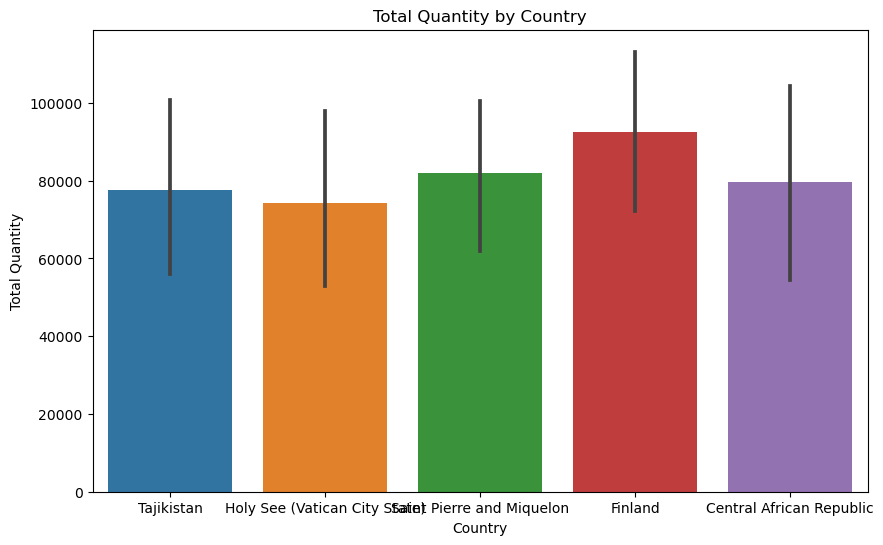

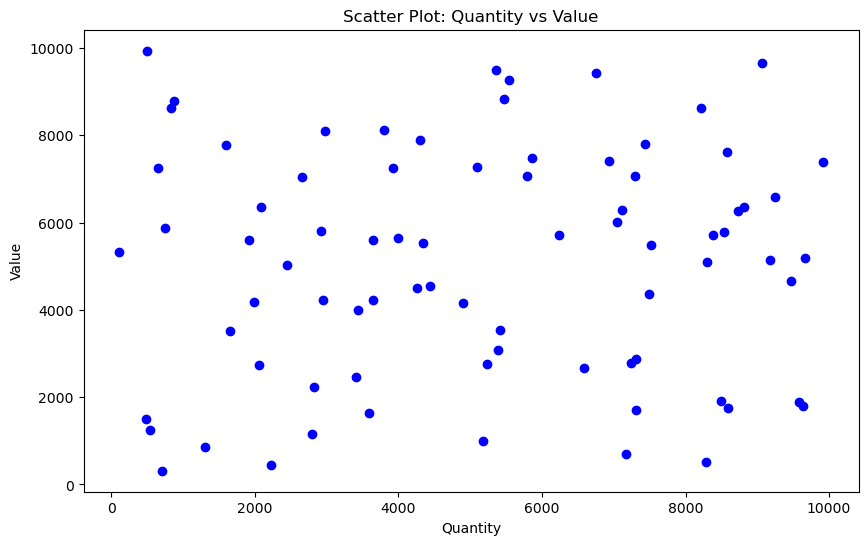

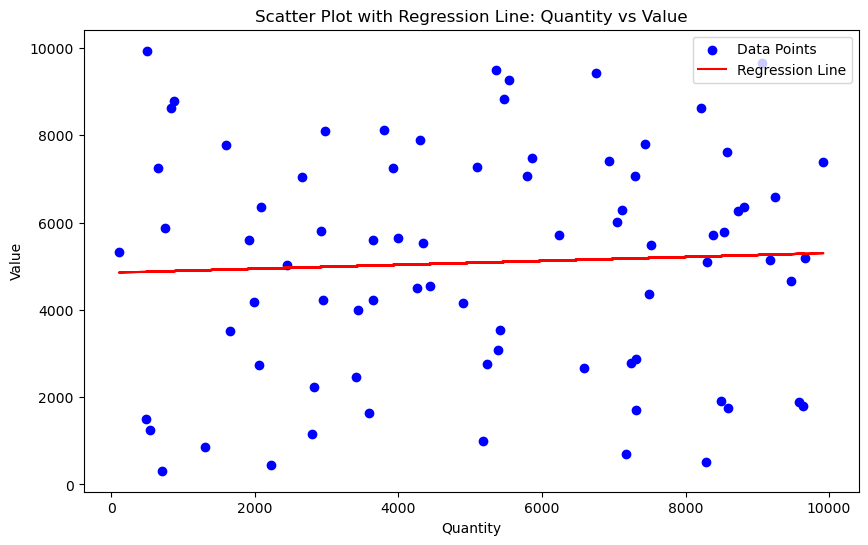

In [207]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import numpy as np

# Assuming 'df_top' is already defined as the top 5 countries with 'Quantity' and 'Value'
# (You can adjust this to fit your dataframe's actual structure)

# 1. Bar plot of Quantity by Country
plt.figure(figsize=(10, 6))
sns.barplot(x='Country', y='Quantity', data=df_top, estimator=np.sum)
plt.title('Total Quantity by Country')
plt.ylabel('Total Quantity')
plt.xlabel('Country')
plt.show()

# 2. Scatter plot of Quantity vs Value
plt.figure(figsize=(10, 6))
plt.scatter(df_top['Quantity'], df_top['Value'], color='blue')
plt.title('Scatter Plot: Quantity vs Value')
plt.ylabel('Value')
plt.xlabel('Quantity')
plt.show()

# 3. Scatter plot with Regression Line (Trend)
X = df_top[['Quantity']]
y = df_top['Value']

# Fit a linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict the trend line
y_pred = model.predict(X)

# Plot scatter with regression line
plt.figure(figsize=(10, 6))
plt.scatter(df_top['Quantity'], df_top['Value'], color='blue', label='Data Points')
plt.plot(df_top['Quantity'], y_pred, color='red', label='Regression Line')
plt.title('Scatter Plot with Regression Line: Quantity vs Value')
plt.ylabel('Value')
plt.xlabel('Quantity')
plt.legend()
plt.show()